<a href="https://colab.research.google.com/github/shanedes/AI/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**important note: this code must all be compiled sequentially*

# Problem 1

imports

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

function that generates m points of x,y data and labels

In [0]:
def get_random_data(w, b, mu, sigma, m):
    
    c = np.random.randint(0, 2, size=m)
    
    # uniform distribution on [0,1) for x_1
    x_1 = np.random.rand(m)
    
    # normal distribution for noise
    n = np.random.normal(mu, sigma, m)
    x_2 = w * x_1 + b + (-1)**c * n
    data = np.column_stack((x_1, x_2))
    labels = c

    return (data, labels)

function that creates a scatterplot of the first 1000 points (at most) of data.

The plot is restricted to 1000 points to reduce compile time and to increase visibilty



In [0]:
def display_random_data(data, labels):
  points = np.column_stack((data, labels))
  # only display at most 1000
  if data.size > 1000:
    points = points[:1000]
  for p in points:
    plt.scatter(p[0], p[1], color='red' if p[2]==1 else 'blue')
  plt.show()

generating data and then displaying it

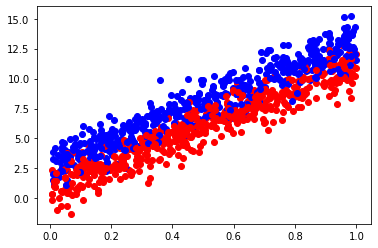

In [0]:
# seed the random variable
np.random.seed(42)
w = 10
b = 2
mu = 1
sigma = 1
m = 10000
data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(data, labels)

split the data 80% into training data and 20% into testing data

In [0]:
split = (int)(m*.8)
train_data = data[:split]
train_label = labels[:split]
test_data = data[split:]
test_label = labels[split:]

# Problem 2

Imports

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

create a model with  binary cross entropy loss and sigmoid activation



In [0]:
network = models.Sequential()
network.add(layers.Dense(1, activation = 'sigmoid', input_shape=(2,)))
network.compile(optimizers.RMSprop(lr=0.01),
                loss='binary_crossentropy',
                metrics=['accuracy'])

train model with data produced from problem 1

In [4]:
history = network.fit(test_data, 
                      test_label,
                      epochs=300,
                      batch_size=512,
                      validation_data=(train_data, train_label))

Epoch 1/300
4/4 [==============================] - 0s 47ms/step - loss: 0.6653 - accuracy: 0.6610 - val_loss: 0.6513 - val_accuracy: 0.5511
Epoch 2/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6530 - accuracy: 0.5880 - val_loss: 0.6462 - val_accuracy: 0.5864
Epoch 3/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6477 - accuracy: 0.6110 - val_loss: 0.6418 - val_accuracy: 0.6100
Epoch 4/300
4/4 [==============================] - 0s 14ms/step - loss: 0.6440 - accuracy: 0.6320 - val_loss: 0.6380 - val_accuracy: 0.6549
Epoch 5/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6396 - accuracy: 0.6600 - val_loss: 0.6343 - val_accuracy: 0.6576
Epoch 6/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6379 - accuracy: 0.6690 - val_loss: 0.6315 - val_accuracy: 0.7170
Epoch 7/300
4/4 [==============================] - 0s 14ms/step - loss: 0.6335 - accuracy: 0.6930 - val_loss: 0.6293 - val_accuracy: 0.7754
Epoch 8/300
4/4 [===

graphing the model

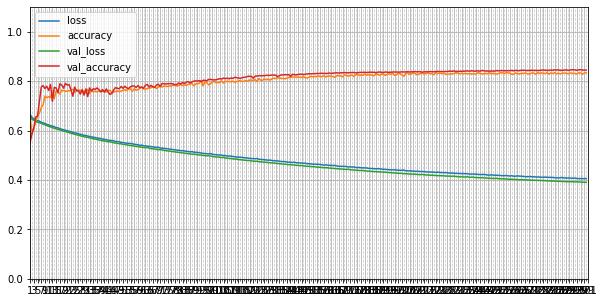

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)

plt.gca().set_ylim(0, 1.1) 
plt.gca().set_xlim(0, 300)

plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which='minor', color='#CCCCCC', linestyle='--')

plt.show()

comparing the true line of seperation to the line of seperation generated by the model.

The white line is the true line, the black line is the one generated by the model.

##how to derive the line of seperation
the equation of a line with two weights like our model is:

> w1(x) + w2(y) + b = 0

the equations for the x-intercepts and y-intercepts are:


> y-intercept = (0, -b / w2)
> x-intercept = (-b / w1, 0)

find the slope from these points


> m = (-b/w2) / (b/w1)

combine these to get slope-intercept form which is the final answer for the slope of the line of seperation


> y = (-(b / w2) / (b / w1))x + (-b / w2)







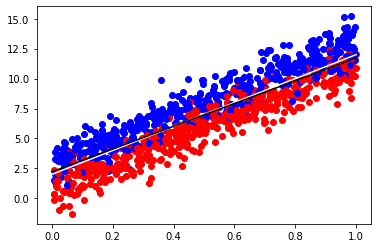

In [6]:
true_line_x = np.linspace(0, 1, 100)
true_line_y = w * true_line_x + b

weights = network.layers[0].get_weights()
model_b = weights[1][0]
w1 =  weights[0][0]
w2 = weights[0][1]

model_line_x = true_line_x
model_line_y = ((-1 * model_b / w2) / (model_b / w1)) * model_line_x + (-1 * model_b / w2)

plt.plot(true_line_x, true_line_y, color="white")
plt.plot(model_line_x, model_line_y, color="black")
display_random_data(data, labels)

heatmap of the models predictions

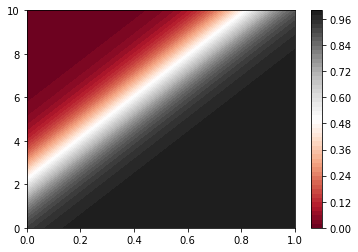

In [25]:
x_cont = np.linspace(0, 1, 100)
y_cont = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x_cont, y_cont)

input_heat = np.column_stack((X.flatten(), Y.flatten()))
Z = network.predict(input_heat)
Z = Z.reshape(X.shape)

plt.contourf(X, Y, Z, 50, cmap='RdGy')
plt.colorbar();
plt.show()

# Problem 3